In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn plotly joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('crop_yield.csv')

In [5]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDataset Statistics:")
print(df.describe())

Dataset Shape: (12669, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12669 entries, 0 to 12668
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             12669 non-null  object 
 1   Crop_Year        12669 non-null  int64  
 2   Season           12669 non-null  object 
 3   State            12668 non-null  object 
 4   Area             12668 non-null  float64
 5   Production       12668 non-null  float64
 6   Annual_Rainfall  12668 non-null  float64
 7   Fertilizer       12668 non-null  float64
 8   Pesticide        12668 non-null  float64
 9   Yield            12668 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 989.9+ KB
None

Dataset Statistics:
          Crop_Year          Area    Production  Annual_Rainfall  \
count  12669.000000  1.266800e+04  1.266800e+04     12668.000000   
mean    2006.911358  1.870207e+05  2.481208e+07      1460.734185   
std

In [6]:
# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:
           Crop  Crop_Year       Season  State     Area   Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0      56708.0   
1     Arhar/Tur       1997  Kharif       Assam   6637.0       4685.0   
2   Castor seed       1997  Kharif       Assam    796.0         22.0   
3      Coconut        1997  Whole Year   Assam  19656.0  126905000.0   
4  Cotton(lint)       1997  Kharif       Assam   1739.0        794.0   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  

Missing values in each column:
Crop               0
Crop_Year          0
Season             0
State              1
Area               1
Production         1
Annual_Rainfall    1
Fertilizer      

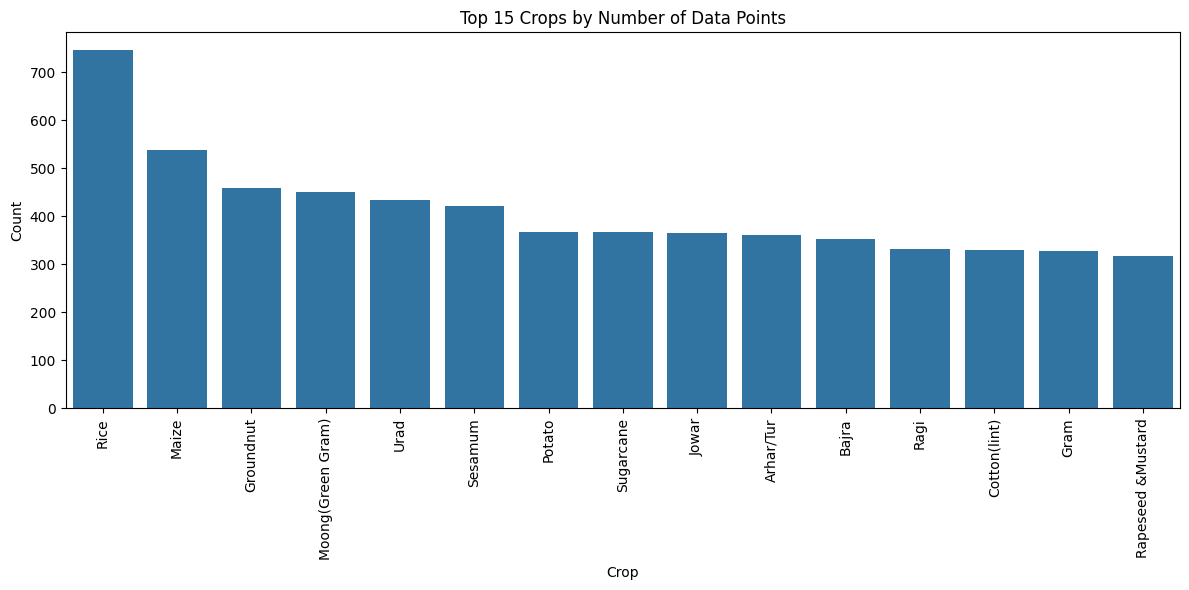

In [7]:
plt.figure(figsize=(12, 6))
crop_counts = df['Crop'].value_counts().sort_values(ascending=False)
sns.barplot(x=crop_counts.index[:15], y=crop_counts.values[:15])
plt.title('Top 15 Crops by Number of Data Points')
plt.xticks(rotation=90)
plt.xlabel('Crop')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

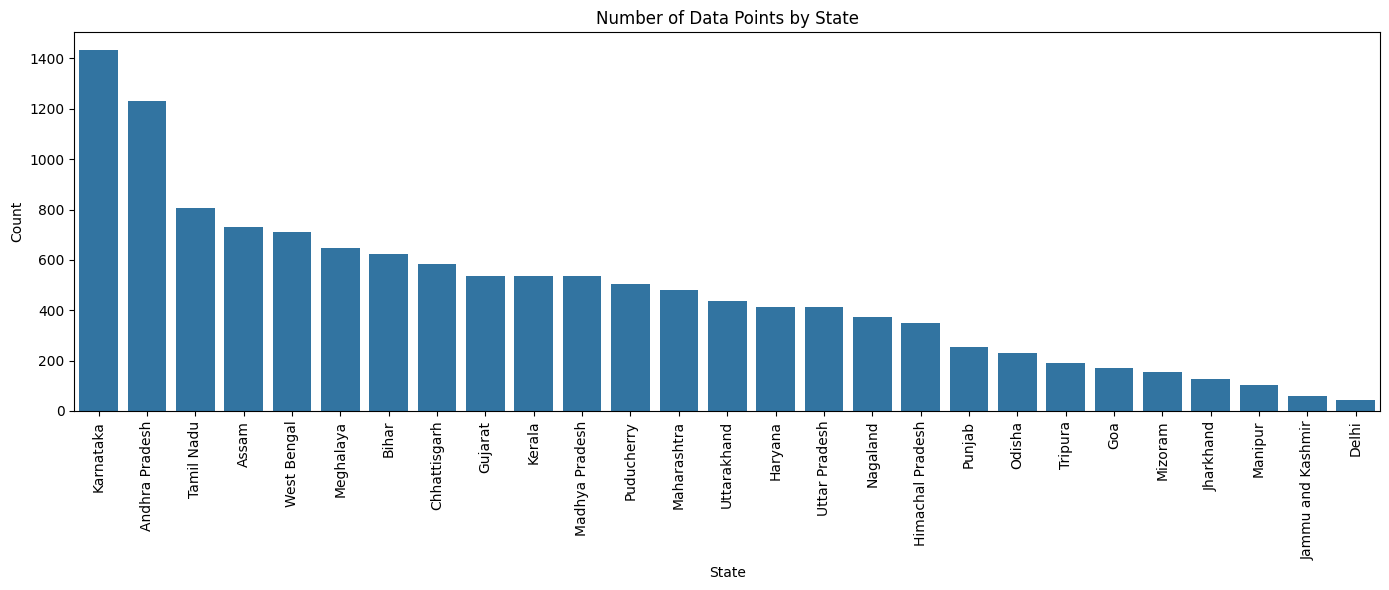

In [8]:
plt.figure(figsize=(14, 6))
state_counts = df['State'].value_counts().sort_values(ascending=False)
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Number of Data Points by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

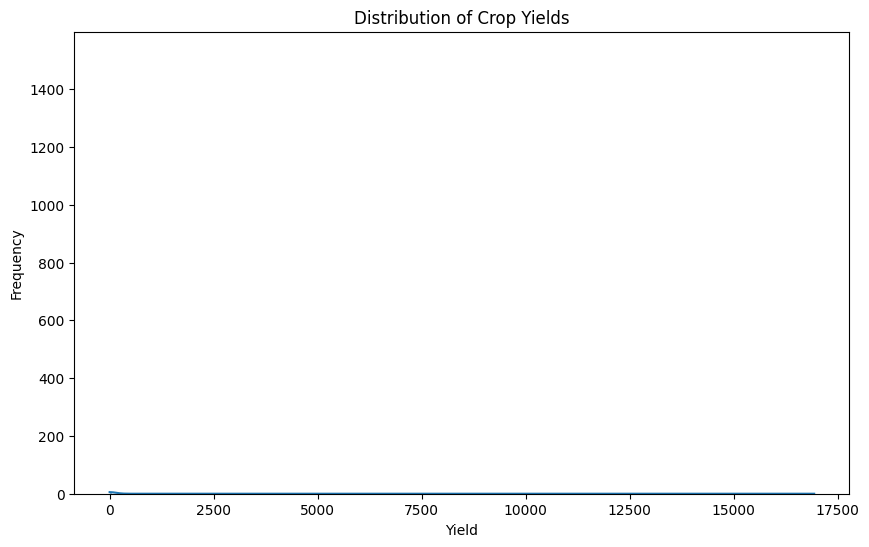

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], kde=True)
plt.title('Distribution of Crop Yields')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

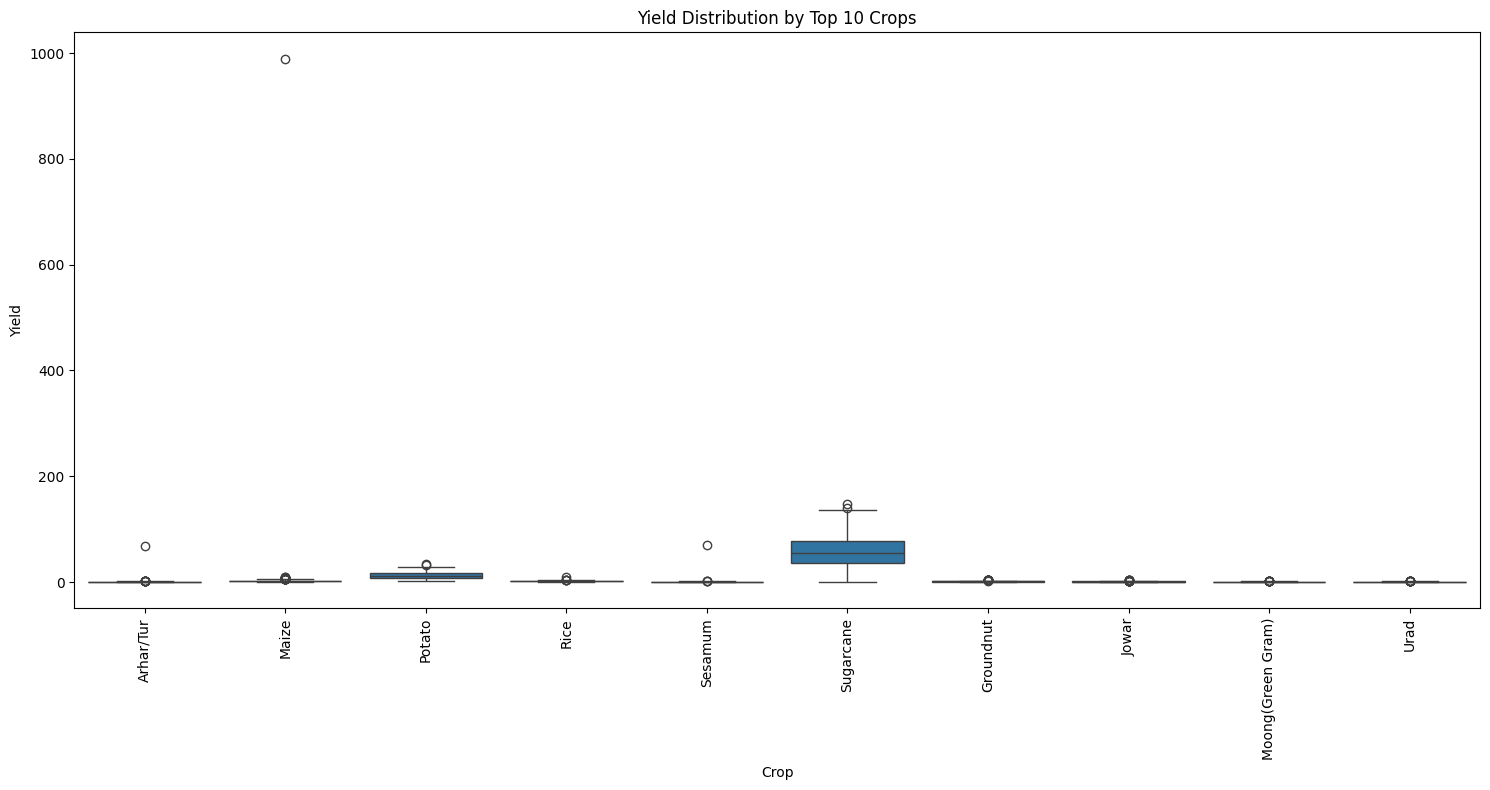

In [10]:
top_crops = crop_counts.index[:10]
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[df['Crop'].isin(top_crops)], x='Crop', y='Yield')
plt.title('Yield Distribution by Top 10 Crops')
plt.xticks(rotation=90)
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.tight_layout()
plt.show()

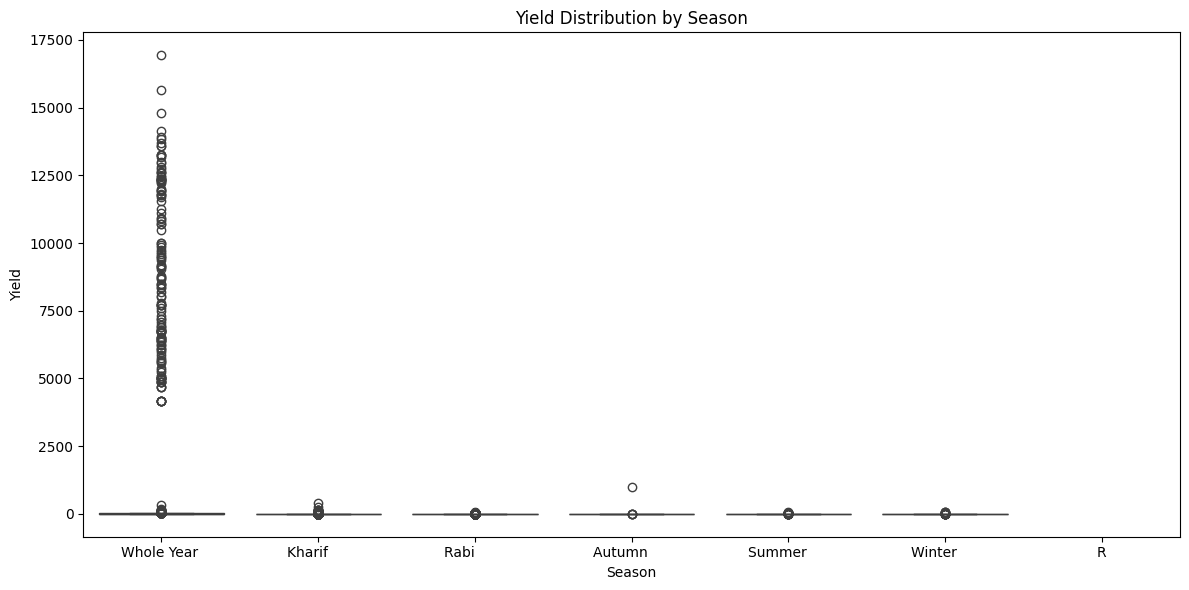

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Season', y='Yield')
plt.title('Yield Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.tight_layout()
plt.show()

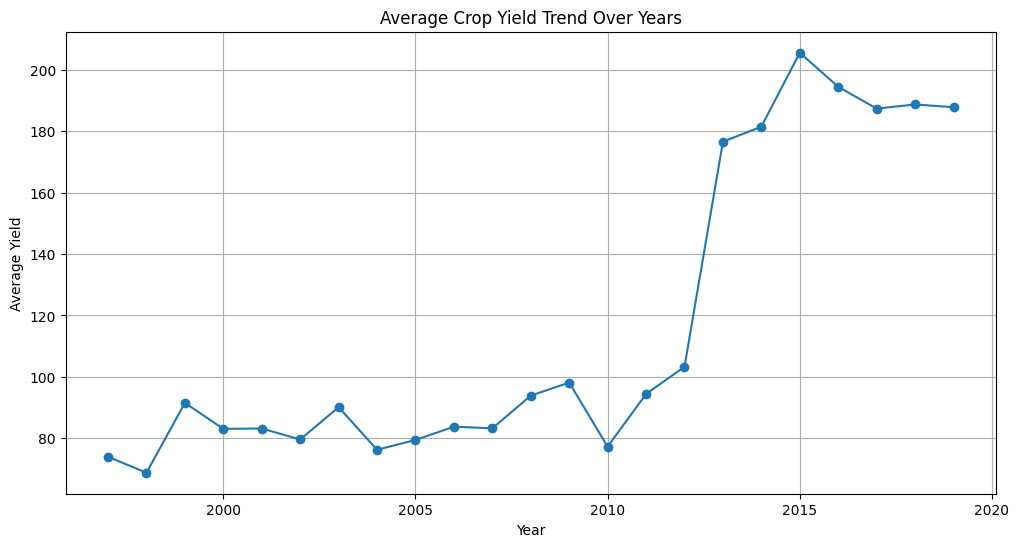

In [12]:
yearly_yields = df.groupby('Crop_Year')['Yield'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_yields['Crop_Year'], yearly_yields['Yield'], marker='o', linestyle='-')
plt.title('Average Crop Yield Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.show()

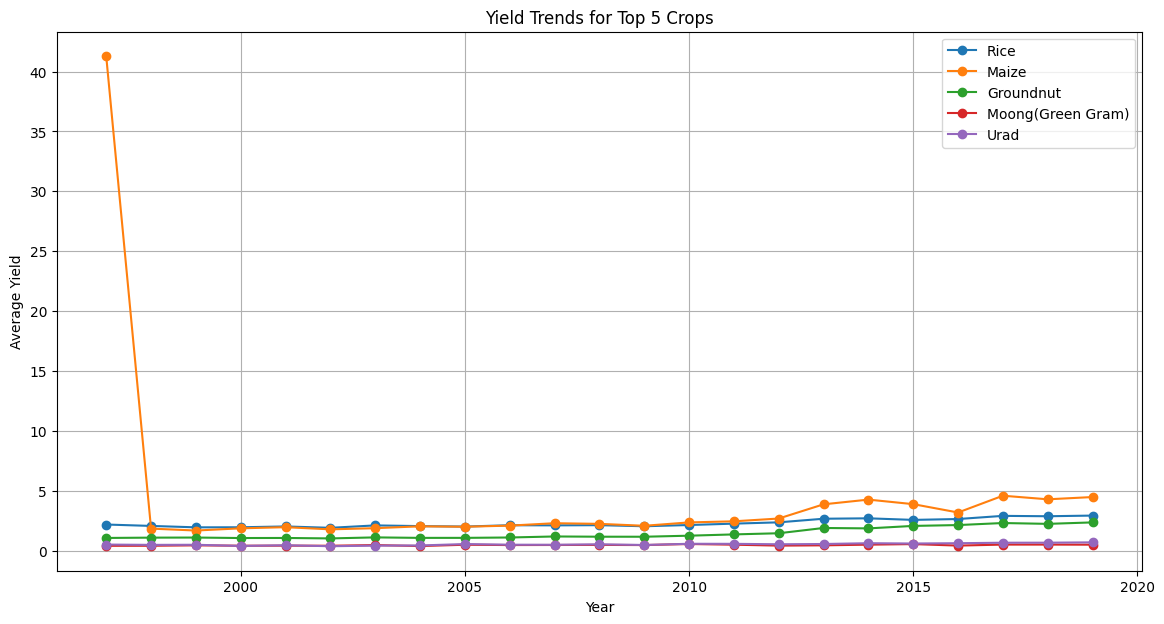

In [13]:
top_5_crops = crop_counts.index[:5]
crop_year_data = df[df['Crop'].isin(top_5_crops)].groupby(['Crop_Year', 'Crop'])['Yield'].mean().reset_index()

plt.figure(figsize=(14, 7))
for crop in top_5_crops:
    crop_data = crop_year_data[crop_year_data['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Yield'], marker='o', label=crop)

plt.title('Yield Trends for Top 5 Crops')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
fig = px.box(df, x='State', y='Yield', color='Season',
             title='Crop Yields by State and Season',
             labels={'Yield': 'Yield', 'State': 'State'})
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [15]:
numeric_cols = ['Area', 'Production', 'Yield', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
corr = df[numeric_cols].corr()
fig = px.imshow(corr, text_auto=True, aspect='auto', color_continuous_scale='RdBu_r',
                title='Correlation Between Numeric Features')
fig.show()

In [16]:
fig = px.scatter(df, x='Area', y='Yield', color='Crop',
                 hover_data=['State', 'Season', 'Annual_Rainfall'],
                 opacity=0.6, title='Relationship Between Area and Yield by Crop')
fig.show()


In [17]:
numeric_features = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
categorical_features = ['Crop_Year', 'Crop', 'State', 'Season']

In [24]:
from sklearn.impute import SimpleImputer

# Update numeric transformer to include imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handles NaN in numeric features
    ('scaler', StandardScaler())
])

# Update categorical transformer to include imputation
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handles NaN in categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Drop rows where y_train is NaN
valid_indices = ~y_train.isna()
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# Now train your pipeline
lr_pipeline.fit(X_train, y_train)
# Retrain the model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Area', 'Production',
                                                   'Annual_Rainfall',
                                                   'Fertilizer', 'Pesticide']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Crop_Year', 'Crop', 'State',
                                                   'Season'])])),
                ('regressor', LinearRegression())])

In [19]:
X = df.drop('Yield', axis=1)
y = df['Yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)


In [27]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")

Linear Regression Results:
Mean Squared Error: 117358.56
R² Score: 0.87
Mean Absolute Error: 72.24


In [28]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [29]:
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")

Random Forest Results:
Mean Squared Error: 17702.82
R² Score: 0.98
Mean Absolute Error: 9.65


In [30]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")
print(f"Mean Absolute Error: {mae_gb:.2f}")


Gradient Boosting Results:
Mean Squared Error: 29633.81
R² Score: 0.97
Mean Absolute Error: 16.26


In [31]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_scores = [mse_lr, mse_rf, mse_gb]
r2_scores = [r2_lr, r2_rf, r2_gb]
mae_scores = [mae_lr, mae_rf, mae_gb]

results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R²': r2_scores,
    'MAE': mae_scores
})

print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
               Model            MSE        R²        MAE
0  Linear Regression  117358.558792  0.866628  72.238709
1      Random Forest   17702.821068  0.979882   9.646632
2  Gradient Boosting   29633.810808  0.966323  16.257390


In [32]:
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Mean Squared Error', 'R² Score', 'Mean Absolute Error'))

# Add traces for MSE (lower is better)
fig.add_trace(
    go.Bar(x=models, y=mse_scores, name='MSE', marker_color='crimson'),
    row=1, col=1
)

# Add traces for R² (higher is better)
fig.add_trace(
    go.Bar(x=models, y=r2_scores, name='R²', marker_color='royalblue'),
    row=1, col=2
)

# Add traces for MAE (lower is better)
fig.add_trace(
    go.Bar(x=models, y=mae_scores, name='MAE', marker_color='green'),
    row=1, col=3
)

fig.update_layout(title_text='Model Performance Comparison', height=500, width=1000)
fig.show()

In [34]:
def plot_feature_importance(importance, names, model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a Dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order of decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # Define plot size
    plt.figure(figsize=(10, 8))

    # Plot feature importance
    sns.barplot(x=fi_df['feature_importance'][:15], y=fi_df['feature_names'][:15])

    # Add plot labels and title
    plt.title(f'Top 15 Feature Importance - {model_type}')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.tight_layout()
    plt.show()

Number of features kept: 116
Final number of features: 116
Number of importances: 116


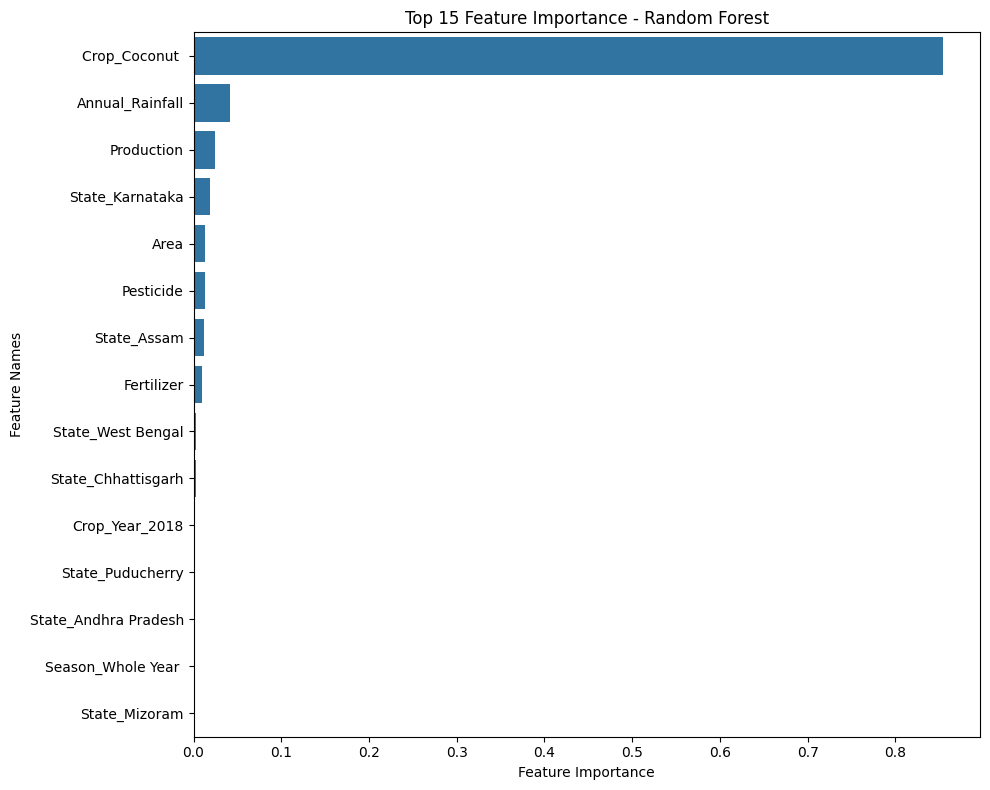

In [38]:
# 1. First, let's verify the exact feature names being generated
preprocessor.fit(X)
numeric_feature_names = numeric_features  # These should pass through as-is

# Get categorical feature names from the one-hot encoder
categorical_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = categorical_encoder.get_feature_names_out(categorical_features)

# 2. Check for constant features that might have been dropped
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_transformed = preprocessor.transform(X_train)
selector.fit(X_transformed)

# Get the mask of kept features
kept_features = selector.get_support()
print(f"Number of features kept: {sum(kept_features)}")

# 3. Align feature names with importances
all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])
final_feature_names = all_feature_names[kept_features]

# 4. Now get importances and verify
rf_pipeline.fit(X_train, y_train)
rf_importances = rf_pipeline.named_steps['regressor'].feature_importances_

print(f"Final number of features: {len(final_feature_names)}")
print(f"Number of importances: {len(rf_importances)}")

# 5. Plot with aligned features
plot_feature_importance(rf_importances, final_feature_names, 'Random Forest')

In [39]:
# Save the feature names
joblib.dump(feature_names, 'model_features.pkl')
joblib.dump(rf_pipeline, 'random_forest_model.pkl')

print("Feature names saved as 'model_features.pkl'")
print("Random Forest model saved as 'random_forest_model.pkl'")

Feature names saved as 'model_features.pkl'
Random Forest model saved as 'random_forest_model.pkl'
